In [22]:
!pip install scikit-learn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_excel('Date-Wise-Prices-all-Commodity.xlsx')

In [13]:
df.head()

,id,order,State,District,Market,Commodity,Variety,Grade,Arrival_Date,min_price,max_price,modal_price
0,Table1,0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Table2,1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Table3,2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Table4,3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Table5,4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0


In [7]:
df.shape

(6435, 12)

In [8]:
df.columns

Index(['diffgr:id', 'msdata:rowOrder', 'State', 'District', 'Market',
       'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min_x0020_Price',
       'Max_x0020_Price', 'Modal_x0020_Price'],
      dtype='object')

In [9]:
df.rename(columns={'diffgr:id':'id','msdata:rowOrder':'order','Min_x0020_Price':'min_price','Max_x0020_Price':'max_price','Modal_x0020_Price':'modal_price'},inplace=True)

In [10]:
df.isnull().sum()

id              0
order           0
State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6435 non-null   object 
 1   order         6435 non-null   int64  
 2   State         6435 non-null   object 
 3   District      6435 non-null   object 
 4   Market        6435 non-null   object 
 5   Commodity     6435 non-null   object 
 6   Variety       6435 non-null   object 
 7   Grade         6435 non-null   object 
 8   Arrival_Date  6435 non-null   object 
 9   min_price     6435 non-null   int64  
 10  max_price     6435 non-null   float64
 11  modal_price   6435 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 603.4+ KB


In [12]:
df.describe()

,order,min_price,max_price,modal_price
count,6435.000000,6435.000000,6435.000000,6435.000000
mean,3217.000000,4107.969231,4676.000738,4415.979705
std,1857.768823,20324.137126,23998.000980,22159.552059
min,0.000000,0.000000,0.000000,3.000000
25%,1608.500000,1200.000000,1420.000000,1300.000000
50%,3217.000000,2300.000000,2600.000000,2500.000000
75%,4825.500000,4400.000000,5000.000000,4607.500000
max,6434.000000,800000.000000,1000000.000000,900000.000000


In [14]:
df['id'].unique()

array(['Table1', 'Table2', 'Table3', ..., 'Table6433', 'Table6434',
       'Table6435'], dtype=object)

In [15]:
df['order'].unique()

array([   0,    1,    2, ..., 6432, 6433, 6434])

In [16]:
df.drop('order',axis=1,inplace=True)
df.head()

,id,State,District,Market,Commodity,Variety,Grade,Arrival_Date,min_price,max_price,modal_price
0,Table1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Table2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Table3,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Table4,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Table5,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0


In [18]:
df['Variety'].unique()

array(['NO 1', 'NO 2', 'NO 3', 'Hybrid', 'Local', 'Jowar ( White)',
       'Hybrid/Local', 'Sona Mahsuri', 'Desi (Whole)', 'Gulabi', 'Sona',
       'Lemon', 'Arkasheela Mattigulla', 'Other', '1st Sort',
       '(Red Nanital)', 'American', 'Amruthapani', 'Cabbage',
       'African Sarson', 'Coriander', 'Annabesahai', 'Deshi',
       'Bottle Gourd', 'Field Pea', 'Bhindi', 'Round/Long',
       'Green Chilly', 'Paddy', 'Lak (Whole)', 'Apple', 'Banana - Ripe',
       'Mousambi', 'Orange', 'Papaya', 'Pomogranate', 'Tamarind Seed',
       'I.R. 36', 'Banana - Green', 'Bitter Gourd', 'Capsicum', 'Carrot',
       'Cauliflower', 'Sapota', 'Cucumbar', 'Average', 'Green Ginger',
       'Green', 'Gwar', 'Guava Navalur', 'Knool Khol',
       'Little gourd (Kundru)', 'Methi', 'Nasik', 'Nagpuri',
       'Papaya (Raw)', 'Peas Wet', 'Potato', 'Pumpkin', 'Raddish',
       'Sweet Potato', 'Tomato', 'Water Melon', 'Common', 'Kanta',
       'Yellow', 'I.R.-64', 'Paddy Medium', 'Brinjal', 'Onion', 'Medium',


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Variety']=le.fit_transform(df['Variety'])
df['Market']=le.fit_transform(df['Market'])
df['Commodity']=le.fit_transform(df['Commodity'])
df['Grade']=le.fit_transform(df['Grade'])
df.head()

,id,State,District,Market,Commodity,Variety,Grade,Arrival_Date,min_price,max_price,modal_price
0,Table1,Andhra Pradesh,Chittor,124,85,222,0,24/02/2023,4000,4100.0,4000.0
1,Table2,Andhra Pradesh,Chittor,124,85,223,0,24/02/2023,3000,3500.0,3500.0
2,Table3,Andhra Pradesh,Chittor,124,85,224,0,24/02/2023,2300,2300.0,2300.0
3,Table4,Andhra Pradesh,Chittor,453,166,155,0,24/02/2023,1340,2000.0,1670.0
4,Table5,Andhra Pradesh,Chittor,570,166,192,0,24/02/2023,640,2160.0,1400.0


In [35]:
x=df.iloc[:,[3,4,5,6,8,9]]
y=df.iloc[:,-1]

<Axes: >

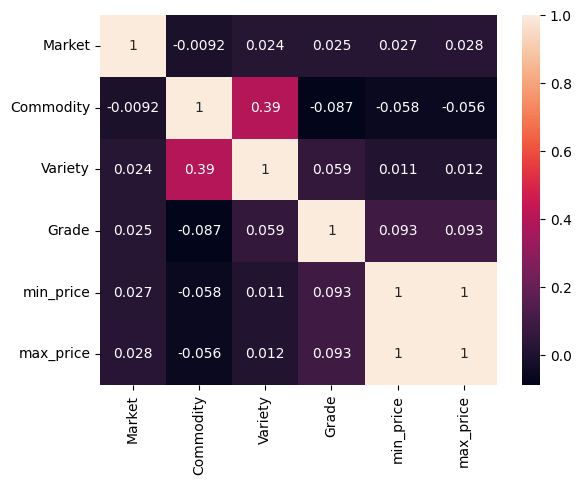

In [36]:
sns.heatmap(data=x.corr(),annot=True)

In [37]:
x=df.iloc[:,[3,4,5,6,8,9]].values
y=df.iloc[:,-1].values

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
y_reg_score=lr.predict(x_test)
y_reg_score

array([1254.78638268, 3310.50963246,  398.54676717, ..., 1398.51500166,
        913.12975819, 1100.97187032])

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,y_reg_score)*100

99.9948203407629